In [1]:
import pandas as pd
from os.path import join
path_raw = 'D:/Documents/Machine learning/Projet'
file_train = 'train.csv'
file_songs = 'songs.csv'
train = pd.read_csv(join(path_raw, file_train), error_bad_lines=False)
#songs = pd.read_csv(join(path_raw, file_songs), error_bad_lines=False)

In [2]:
songs = pd.read_csv(join(path_raw, file_songs), error_bad_lines=False)
songs['song_id2']=songs.index


In [3]:
train=pd.merge(train,songs[['song_id','song_id2']])

In [4]:
file_members = 'members.csv'
members = pd.read_csv(join(path_raw, file_members), error_bad_lines=False)
members['memb_id']=members.index

In [5]:
train=pd.merge(train,members[['msno','memb_id']])

In [6]:
train=train[['song_id2','memb_id','source_system_tab','source_screen_name','source_screen_name','target']]

In [9]:
# Découpage de train 70% apprentissage, 30% validation
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(train, shuffle=True, test_size=0.2, stratify=train['target'])

In [11]:
train_data

,song_id2,memb_id,source_system_tab,source_screen_name,source_screen_name,target
6961185,13829,10968,search,Online playlist more,Online playlist more,0
106990,1503107,4334,radio,Radio,Radio,1
2260677,4044,13592,my library,Local playlist more,Local playlist more,0
2516859,1054827,28562,explore,Explore,Explore,1
7071377,2244513,19204,discover,Discover Chart,Discover Chart,1
555264,32136,9262,search,Search,Search,0
7364976,208822,3542,my library,Local playlist more,Local playlist more,1
2730094,2250553,4929,my library,NaN,NaN,0
479880,11028,30273,discover,Online playlist more,Online playlist more,0
7116742,2206729,22028,notification,Album more,Album more,0


In [13]:
import numpy as np
n_songs=len(np.unique(train['song_id2']))
n_users=len(np.unique(train['memb_id']))

In [15]:
n_users

30755

In [33]:
import numpy as np
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_songs))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

IndexError: index 159256 is out of bounds for axis 0 with size 707

In [70]:
pd.DataFrame(traina_genr.head(40))

target
msno                                         genre_ids        
++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU= 1180           -1
                                             1259          -14
                                             139             3
                                             1609            2
                                             1616           -6
                                             1616|1609      -3
                                             2022           -5
                                             359            10
                                             451             0
                                             458             8
                                             465            20
                                             465|1259        0
                                             474            -6
                                             921            -2
                                             921|458         1
++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg= 1011            0
                                             1180            1
                                             1259            0
                                             1609            2
                                             1616|1609       1
                                             359             1
                                             444             1
                                             444|1259        1
                                             458            14
                                             465            20
                                             465|430         1
                                             465|458        -2
                                             921            -1
                                             921|458         1
                                             921|465        -1
++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk= 451             1
                                             458             7
                                             465            14
                                             465|1259       -2
                                             465|2022        2
                                             829             1
                                             921             1
                                             921|458         1
                                             921|465         1
++xWL5Pbi2CpG4uUugigQahauM0J/sBIRloTNPBybIU= 1609           -1

In [3]:
n_users = train.msno.unique().shape[0]
n_songs = train.song_id.unique().shape[0]
n_genres=train.genre_ids.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of songs = ' + str(n_songs)+' Nb de genre'+str(n_genres))

AttributeError: 'DataFrame' object has no attribute 'genre_ids'

In [77]:
import numpy as np
#Create two user-item matrices, one for training and another for testing
traina_matrix = np.zeros((n_users, n_genres))
for line in pd.DataFrame(traina.head(1)).itertuples():
    print(line[1])

2692547


In [15]:
for line in traina.head().itertuples():
    print(line[1])

B4P1g6sGBILzGhelH/YKkfpkFgWfn/LgS4KgU+bEaD0=
cF/VJmBHwhcqdd016oPP1wXBdWSjxEHEzwlhEn4+/4A=
EMSPi4zfjuQwgG0mQno6aEtZEbKyUB6v9J5yb1/WcPo=
1+FZjWmF06IxSgjoj2vObzk5R4uKxSSChnZ+eA6mhjk=
Cu5boda+y1Bx+e7yvix7cCqe5gyweSVhQ6Dp6VGvnTM=


In [67]:
for line in pd.DataFrame(traina_genr.head(2)).itertuples():
    print(line[0][0])

++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=
++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=


In [1]:
pos.values

NameError: name 'pos' is not defined

In [36]:
import pandas as pd
train_data=pd.read_csv('train_data_pos',index_col=0)+pd.read_csv('train_data_neg',index_col=0)
test_data=pd.read_csv('test_data_pos',index_col=0)+pd.read_csv('test_data_neg',index_col=0)

In [37]:
train_data_matrix=train_data.fillna(0).values
test_data_matrix=test_data.fillna(0).values

In [45]:
from sklearn.metrics.pairwise import pairwise_distances
#user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [46]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [47]:
import numpy as np
item_prediction = predict(train_data_matrix, item_similarity, type='item')

In [6]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [49]:
item_prediction

array([[ 1.9382716 ,  1.95027942,  1.72386448, ...,  1.94240542,
         1.9360603 ,  1.90853713],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00617284, -0.0062782 , -0.00514638, ..., -0.00608171,
        -0.00598766, -0.00577929],
       ..., 
       [ 0.01234568,  0.01245141,  0.01136605, ...,  0.01239142,
         0.01236324,  0.01220626],
       [ 0.33333333,  0.33551275,  0.29678443, ...,  0.33402141,
         0.33291001,  0.32835242],
       [-0.00617284, -0.00620584, -0.005386  , ..., -0.00617963,
        -0.00615523, -0.00606735]])

In [50]:
print ('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

Item-based CF RMSE: 16.190876711435422


In [33]:
test_data_matrix.shape

(29325, 159)

In [34]:
sparsity=round(1.0-len(train)/float(n_users*n_songs),3)
print ('The sparsity level of KKBox is ' +  str(sparsity*100) + '%')

NameError: name 'train' is not defined

In [38]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds
import numpy as np
#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 50)
u=u[:,::-1]
s=s[::-1]
vt=vt[::-1,:]
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print ('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 16.269336103521205


In [8]:
error=list()
for i in range(2,40):
    s_diag_matrix=np.diag(s[:i])
    X_pred = np.dot(np.dot(u[:,0:i], s_diag_matrix), vt[0:i])
    error.append(rmse(X_pred, test_data_matrix))

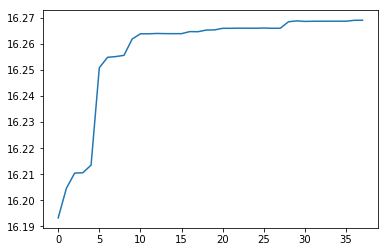

In [9]:
from matplotlib import pyplot as plt

plt.plot(error)
plt.show()

In [17]:
train_data_matrix=train_data_matrix[:10000,:]
W = train_data_matrix!=0
W[W == True] = 1
W[W == False] = 0
# To be consistent with our Q matrix
W = W.astype(np.float64, copy=False)

In [19]:
W.shape

(10000, 163)

In [20]:
from scipy.sparse.linalg import svds

u, s, vt = svds(train_data_matrix, k = 50)
u=u[:,::-1]# taille (30414,163)
s=s[::-1] # vect col taille 50
vt=vt[::-1,:] # taille (50,1682)

In [21]:
lambda_ = 0.1
m, n = train_data_matrix.shape
n_iterations = 5
n_factors = 50

In [22]:
def get_error(Q, X, Y, W):
    return np.sum((W * (Q - np.dot(X, Y)))**2)

In [23]:
weighted_errors = []
for ii in range(n_iterations):
    for j, Wj in enumerate(W.T):# fixe u et optimise v (parcours des films)
        XtWX =np.dot(u.T, np.dot(np.diag(Wj), u))
        vt[:,j] = np.linalg.solve(XtWX + lambda_ * np.eye(n_factors),
                               np.dot(u.T, np.dot(np.diag(Wj), train_data_matrix[:,j])))

    for i, Wi in enumerate(W):# fixev et optimise u (parcours des utilisateurs)
        YWYt =np.dot(vt, np.dot(np.diag(Wi), vt.T))
        u[i] = np.linalg.solve(YWYt + lambda_ * np.eye(n_factors),
                                 np.dot(vt, np.dot(np.diag(Wi), train_data_matrix[i].T))).T
    weighted_errors.append(get_error(train_data_matrix, u, vt, W))
    print('{}th iteration is completed'.format(ii))

0th iteration is completed
1th iteration is completed
2th iteration is completed
3th iteration is completed
4th iteration is completed


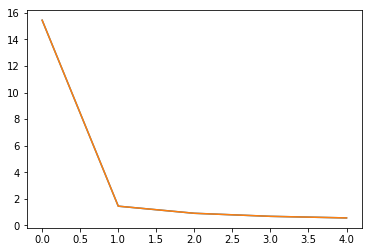

In [25]:
from matplotlib import pyplot as plt
plt.plot(weighted_errors)
plt.show()

In [26]:
weighted_errors

[15.441353600096766,
 1.4416674755974723,
 0.90629293094394914,
 0.67658858893389373,
 0.5570674475773284]

In [30]:
np.dot(u, vt)

array([[  0.00000000e+00,   0.00000000e+00,   8.45609781e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.18528084e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,  -3.51580647e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   7.23744053e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,  -4.34526248e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [43]:
songs = pd.read_csv(join(path_raw, file_songs), error_bad_lines=False)

In [50]:
pd.DataFrame(songs.genre_ids)

,genre_ids
0,465
1,444
2,465
3,465
4,726
5,864|857|850|843
6,458
7,465
8,465
9,352|1995
